# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

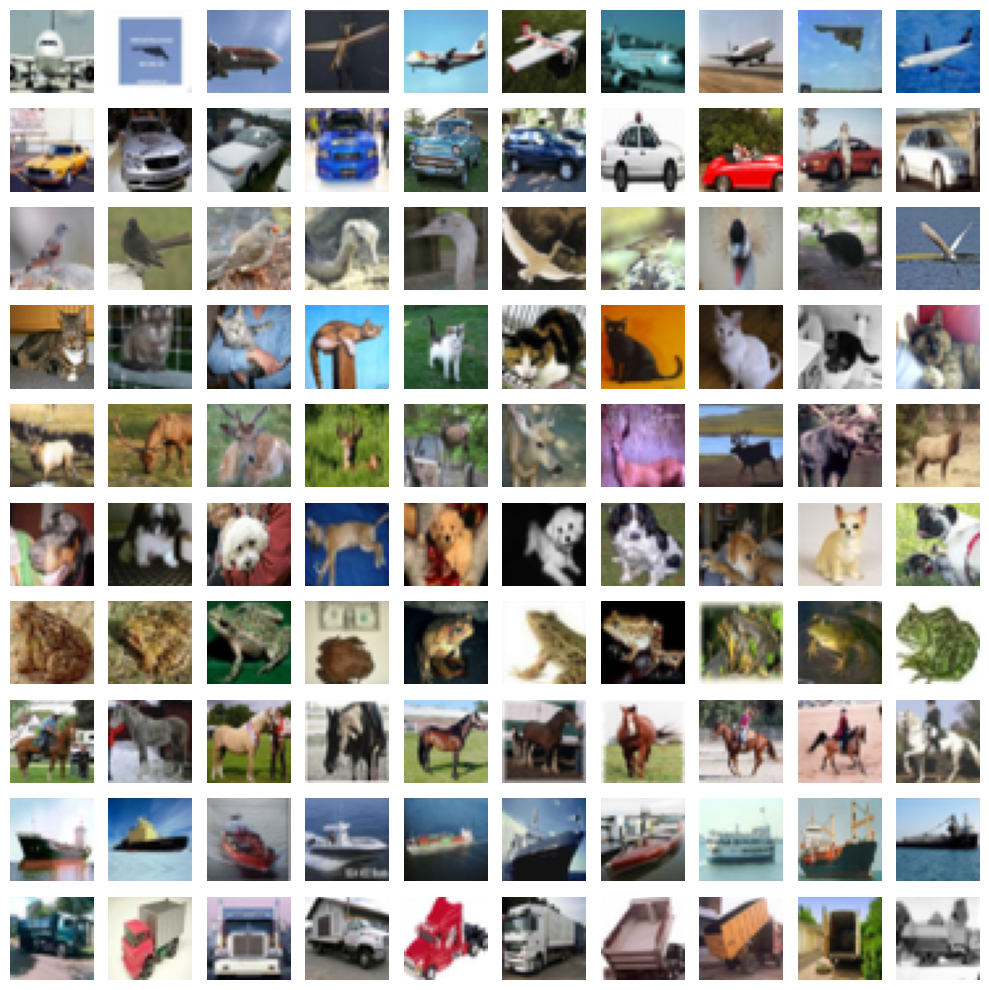

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

for class_id in range(10):
    class_indices = np.where(y_train.flatten() == class_id)[0]
    selected_images = np.random.choice(class_indices, 10, replace=False)

    for i, img_idx in enumerate(selected_images):
        plt.subplot(10, 10, class_id * 10 + i + 1)
        plt.imshow(x_train[img_idx])  # No cmap, as CIFAR-10 is RGB
        plt.axis('off')

# Show plot
plt.tight_layout()
plt.show()

In [3]:
#Convert the labels to one-hot encoded form.
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print("y_train shape after one-hot encoding:", y_train.shape)
print("y_test shape after one-hot encoding:", y_test.shape)


y_train shape after one-hot encoding: (50000, 10)
y_test shape after one-hot encoding: (10000, 10)


In [4]:
#Normalize

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

print(x_train.shape)
print(x_test.shape)
print("Pixel value range:", x_train.min(), "to", x_train.max())


(50000, 32, 32, 3)
(10000, 32, 32, 3)
Pixel value range: 0.0 to 1.0


## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [6]:
from keras.backend import clear_session
clear_session()

In [7]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32,32,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         720,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [8]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=512, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 80ms/step - accuracy: 0.2030 - loss: 2.1884 - val_accuracy: 0.2768 - val_loss: 2.0048
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3076 - loss: 1.9447 - val_accuracy: 0.3586 - val_loss: 1.8484
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3540 - loss: 1.8450 - val_accuracy: 0.3461 - val_loss: 1.8209
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3812 - loss: 1.7775 - val_accuracy: 0.3893 - val_loss: 1.7434
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3940 - loss: 1.7378 - val_accuracy: 0.4119 - val_loss: 1.6978
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4152 - loss: 1.6825 - val_accuracy: 0.4099 - val_loss: 1.6619
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4257 - loss: 1.6428 - val_accuracy: 0.4339 - val_loss: 1.6169
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4432 - loss: 1.6060 - val_accuracy: 0.4426 - val_los

*   Plot the cross entropy loss curve and the accuracy curve

---



In [9]:
# Print final accuracy and loss
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Training Accuracy: {train_acc:.4f}, Training Loss: {train_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

Training Accuracy: 0.6265, Training Loss: 1.0860
Test Accuracy: 0.5932, Test Loss: 1.1680


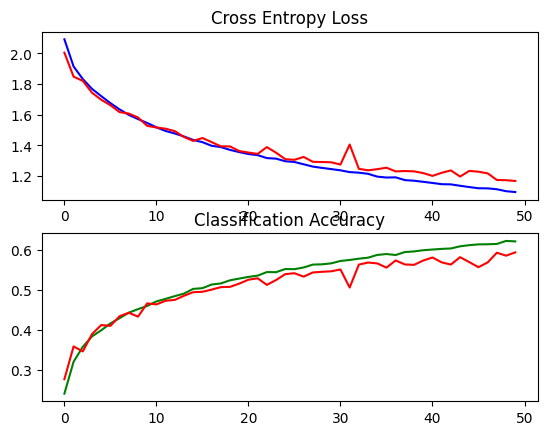

In [10]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='red', label='val')

# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='green', label='train')
plt.plot(history.history['val_accuracy'], color='red', label='val')
plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [6]:
from keras.backend import clear_session
clear_session()

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import SGD

vgg_model = Sequential()

# Stack two convolutional layers with 32 filters each (3x3), ReLU activation, same padding
vgg_model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
vgg_model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
vgg_model.add(MaxPooling2D((2, 2)))
vgg_model.add(Flatten())
# Fully connected dense layer with 128 units
vgg_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
# Output classification layer with 10 classes (softmax activation)
vgg_model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [11]:
vgg_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = vgg_history = vgg_model.fit(x_train, y_train, epochs=50, batch_size=512, validation_data=(x_test, y_test))

# Print model summary
vgg_model.summary()


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 102ms/step - accuracy: 0.2024 - loss: 2.2419 - val_accuracy: 0.2724 - val_loss: 1.9822
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.2955 - loss: 1.9768 - val_accuracy: 0.3480 - val_loss: 1.8790
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3496 - loss: 1.8498 - val_accuracy: 0.3941 - val_loss: 1.7563
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3769 - loss: 1.7708 - val_accuracy: 0.3594 - val_loss: 1.7980
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4011 - loss: 1.7082 - val_accuracy: 0.4139 - val_loss: 1.6636
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4174 - loss: 1.6564 - val_accuracy: 0.4063 - val_loss: 1.6461
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4328 - loss: 1.6037 - val_accuracy: 0.4393 - val_loss: 1.5746
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4497 - loss: 1.5634 - val_accuracy: 0.4438 -

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,060,140 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


In [12]:
train_loss, train_acc = vgg_train_loss, vgg_train_acc = vgg_model.evaluate(x_train, y_train, verbose=0)
test_loss, test_acc = vgg_test_loss, vgg_test_acc = vgg_model.evaluate(x_test, y_test, verbose=0)
print(f"VGG Model - Training Accuracy: {vgg_train_acc:.4f}, Training Loss: {vgg_train_loss:.4f}")
print(f"VGG Model - Test Accuracy: {vgg_test_acc:.4f}, Test Loss: {vgg_test_loss:.4f}")



VGG Model - Training Accuracy: 0.6922, Training Loss: 0.8894
VGG Model - Test Accuracy: 0.6179, Test Loss: 1.0858


**Comment on the observation**

Model 1:
Training Accuracy: 0.6265, Training Loss: 1.0860
Test Accuracy: 0.5932, Test Loss: 1.1680

Model 2:
VGG Model - Training Accuracy: 0.7008, Training Loss: 0.8680
VGG Model - Test Accuracy: 0.6475, Test Loss: 1.0290

Model 2 is slightly better.

...

[link text](https://)*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


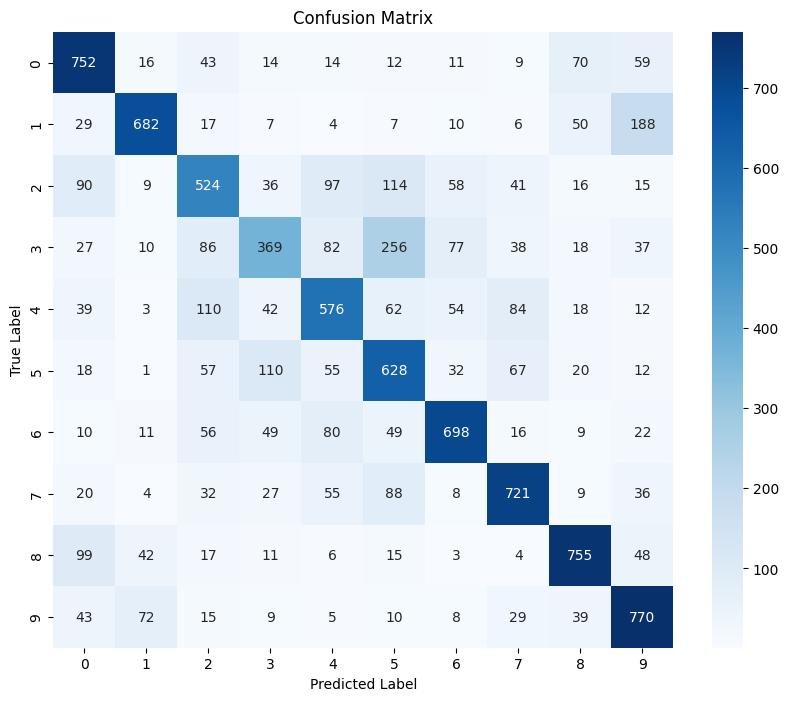

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict on test set
y_pred = vgg_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**Comment here :**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

In [18]:
print(f"VGG Model - Training Accuracy: {vgg_train_acc:.4f}, Training Loss: {vgg_train_loss:.4f}")
print(f"VGG Model - Test Accuracy: {vgg_test_acc:.4f}, Test Loss: {vgg_test_loss:.4f}")


VGG Model - Training Accuracy: 0.7008, Training Loss: 0.8680
VGG Model - Test Accuracy: 0.6475, Test Loss: 1.0290


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [13]:
from keras.backend import clear_session
clear_session()

In [24]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from keras.layers import Dropout


# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Resize input to 64x64
import tensorflow as tf
x_train = tf.image.resize(x_train, (64, 64)).numpy()
x_test = tf.image.resize(x_test, (64, 64)).numpy()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


# Initialize the deeper VGG-style model
deep_vgg_model = Sequential()

# Stack two convolutional layers with 64 filters each (3x3), ReLU activation, same padding
deep_vgg_model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform', input_shape=(64, 64, 3)))
deep_vgg_model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))

# Max pooling layer
deep_vgg_model.add(MaxPooling2D((2, 2)))

# Stack two convolutional layers with 128 filters each (3x3), ReLU activation, same padding
deep_vgg_model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
deep_vgg_model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))

# Max pooling layer
deep_vgg_model.add(MaxPooling2D((2, 2)))

# Stack two convolutional layers with 256 filters each (3x3), ReLU activation, same padding
deep_vgg_model.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
deep_vgg_model.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))

# Max pooling layer
deep_vgg_model.add(MaxPooling2D((2, 2)))

# Flatten the feature maps
deep_vgg_model.add(Flatten())

# Fully connected dense layer with 128 units
deep_vgg_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
deep_vgg_model.add(Dropout(0.5))  # <- Add dropout before the final layer

# Output classification layer with 10 classes (softmax activation)
deep_vgg_model.add(Dense(10, activation='softmax'))


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Compile the model
deep_vgg_model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9, decay=0.0001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])


# Train the model and store history
#history = deep_vgg_history = deep_vgg_model.fit(x_train, y_train, epochs=10, batch_size=512, validation_data=(x_test, y_test))
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

# Train the model with data augmentation
history = deep_vgg_history = deep_vgg_model.fit(datagen.flow(x_train, y_train, batch_size=512),
                             epochs=10,
                             validation_data=(x_test, y_test))


Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 61s 587ms/step - accuracy: 0.7213 - loss: 0.8113 - val_accuracy: 0.7741 - val_loss: 0.6507
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 55s 562ms/step - accuracy: 0.7264 - loss: 0.8025 - val_accuracy: 0.7867 - val_loss: 0.6208
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 55s 558ms/step - accuracy: 0.7356 - loss: 0.7758 - val_accuracy: 0.7900 - val_loss: 0.6212
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 55s 559ms/step - accuracy: 0.7351 - loss: 0.7759 - val_accuracy: 0.7914 - val_loss: 0.6101
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 55s 562ms/step - accuracy: 0.7432 - loss: 0.7476 - val_accuracy: 0.7929 - val_loss: 0.6117
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 56s 571ms/step - accuracy: 0.7532 - loss: 0.7221 - val_accuracy: 0.7874 - val_loss: 0.6309
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 54s 553ms/step - accuracy: 0.7501 - loss: 0.7255 - val_accuracy: 0.7942 - val_loss: 0.5902
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 55s 556ms/step - accuracy: 0.7625 - loss: 0.6989 - val_accu

In [32]:
# Print final accuracy and loss
train_loss, train_acc = deep_vgg_train_loss, deep_vgg_train_acc = deep_vgg_model.evaluate(x_train, y_train, verbose=0)
test_loss, test_acc = deep_vgg_test_loss, deep_vgg_test_acc = deep_vgg_model.evaluate(x_test, y_test, verbose=0)
print(f"Deep VGG Model - Training Accuracy: {deep_vgg_train_acc:.4f}, Training Loss: {deep_vgg_train_loss:.4f}")
print(f"Deep VGG Model - Test Accuracy: {deep_vgg_test_acc:.4f}, Test Loss: {deep_vgg_test_loss:.4f}")


Deep VGG Model - Training Accuracy: 0.8539, Training Loss: 0.4212
Deep VGG Model - Test Accuracy: 0.8085, Test Loss: 0.5540


after changing SDG:
Deep VGG Model - Training Accuracy: 0.9063, Training Loss: 0.2918
Deep VGG Model - Test Accuracy: 0.7003, Test Loss: 0.9721

After drop out:
Deep VGG Model - Training Accuracy: 0.7439, Training Loss: 0.7387
Deep VGG Model - Test Accuracy: 0.6872, Test Loss: 0.9029

after data augementation:
Deep VGG Model - Training Accuracy: 0.7977, Training Loss: 0.5826
Deep VGG Model - Test Accuracy: 0.7618, Test Loss: 0.6850

adjusting SDG again (reducing learing rate decay)
Deep VGG Model - Training Accuracy: 0.8539, Training Loss: 0.4212
Deep VGG Model - Test Accuracy: 0.8085, Test Loss: 0.5540

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


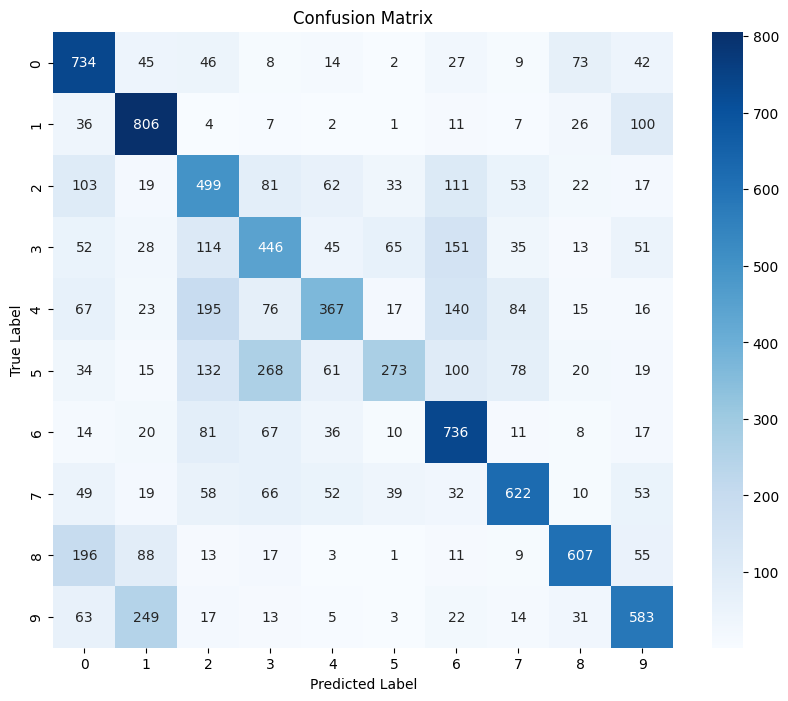

In [17]:
# Predict on test set
y_pred = deep_vgg_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:

An activation function is a mathematical rule that decides whether a neuron in a neural network should be activated (turned on) or deactivated (turned off) based on the input it receives.
adds non-linearity allowing neural networks to learn complex patterns

_

2 - Key Differences between sigmoid and softmax:

Sigmoid:
Used when there’s only one output neuron.
The output represents the probability of belonging to a class.

Softmax:
When you need mutually exclusive classes (e.g., one image is either a cat, dog, or airplane).
In the final layer of a multi-class classification model.


_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:

binary: Evaluates probability of a single class

Categorical: Evaluates probability distribution over all classes

_
